# Project Name: Wine Quality Prediction


Here we will predict the quality of wine on the basis of given features. We use the wine quality dataset available on Internet for free. This dataset has the fundamental features which are responsible for affecting the quality of the wine. By the use of several Machine learning models, we will predict the quality of the wine.

In [2]:
import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

%matplotlib inline

In [4]:
wine = pd.read_csv("WineQT.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
#Reding stock data set
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
print(wine.shape)

(1143, 13)


In [8]:
#Exploratory Data Analysis
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
wine.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

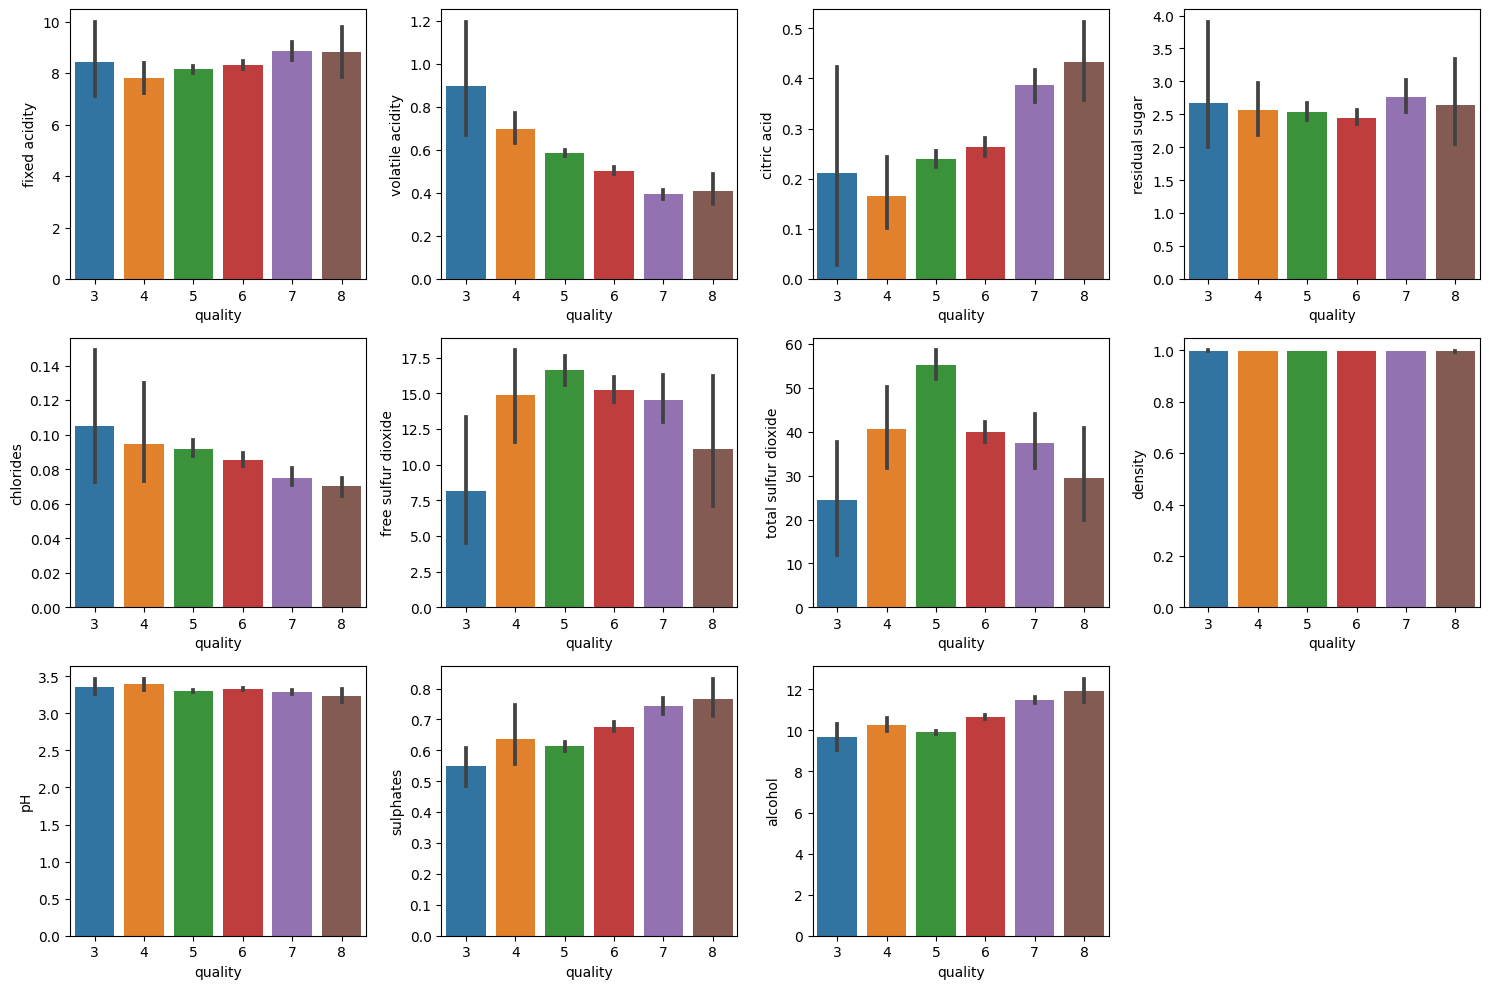

In [10]:
# creating subplots and visualizing datar
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine)

plt.tight_layout()

<AxesSubplot: >

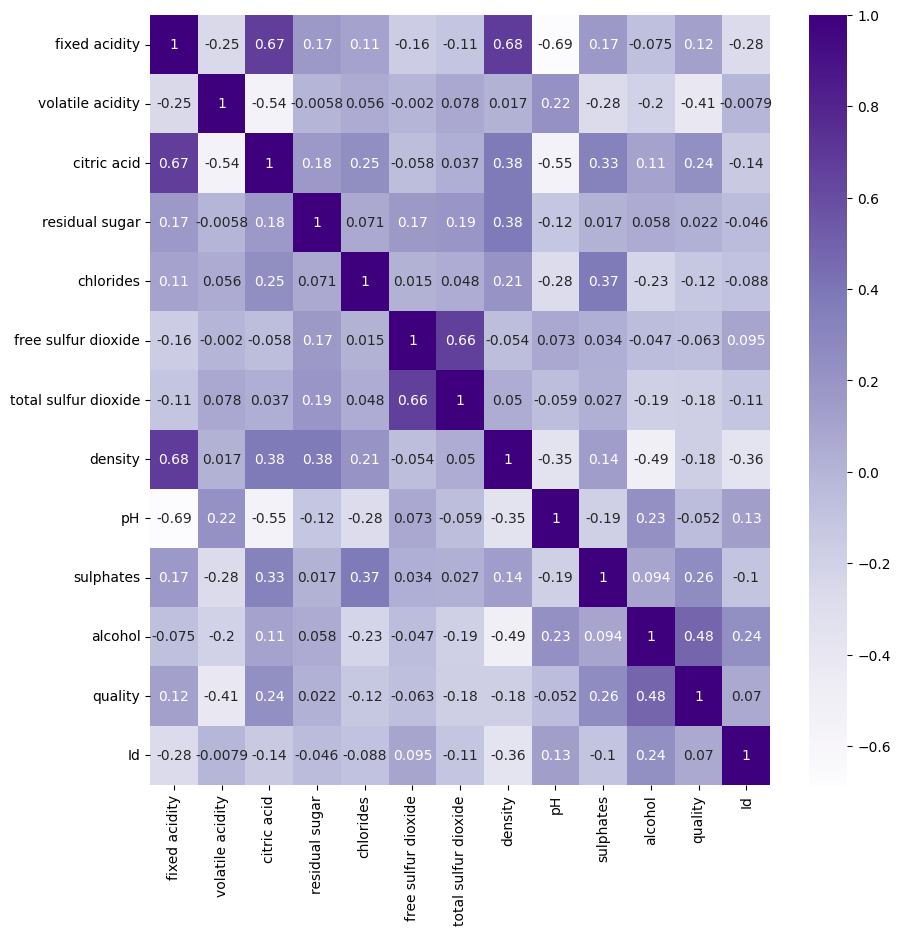

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),annot=True,cmap="Purples")

In [12]:
#Model Development

In [13]:
wine['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [14]:
ranges = (2,6.5,8) 
groups = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=ranges,labels=groups)

In [15]:
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4


In [16]:
wine['quality'].value_counts()

0    984
1    159
Name: quality, dtype: int64

In [17]:
good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]

bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]

new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
985,6.6,0.640,0.31,6.1,0.083,7.0,49.0,0.99718,3.35,0.68,10.3,0,1388
611,8.2,0.260,0.34,2.5,0.073,16.0,47.0,0.99594,3.40,0.78,11.3,1,857
666,8.3,0.300,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1,1,944
849,7.9,0.340,0.36,1.9,0.065,5.0,10.0,0.99419,3.27,0.54,11.2,1,1201
978,7.5,0.570,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8,0,1379
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,0,1478
823,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0,0,1164
961,7.6,0.645,0.03,1.9,0.086,14.0,57.0,0.99690,3.37,0.46,10.3,0,1353
23,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,0,32


In [18]:
new_df['quality'].value_counts()

0    217
1    159
Name: quality, dtype: int64

In [19]:
new_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.550116
citric acid             0.341825
sulphates               0.335425
fixed acidity           0.153874
residual sugar          0.052650
Id                     -0.007840
free sulfur dioxide    -0.087105
pH                     -0.117831
total sulfur dioxide   -0.157066
chlorides              -0.211090
density                -0.217443
volatile acidity       -0.437934
Name: quality, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
x = new_df.drop('quality',axis=1) 
y = new_df['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier()

In [25]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(x_train, y_train)

print('Best parameters --> ', grid_rf.best_params_)



In [25]:
# Wine Quality Prediction
pred = grid_rf.predict(x_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

[[34 10]
 [ 6 26]]


              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.72      0.81      0.76        32

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76



0.7894736842105263
